#Analisis del dataset de segmentacion de clientes

---



## **1.Carga del dataset y analisis exploratorio**


---



https://www.kaggle.com/datasets/dev0914sharma/customer-clustering


### Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.


---




In [ ]:
import pandas as pd #importa la libreria pandas especializada en el manejo y análisis de estructuras de datos. https://aprendeconalf.es/docencia/python/manual/pandas/
import numpy as np #importa la libreria numpy cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos. https://aprendeconalf.es/docencia/python/manual/numpy/
import matplotlib.pyplot as plt #importa la libreria matplotlib especializada en la creación de gráficos en dos dimensiones. https://aprendeconalf.es/docencia/python/manual/matplotlib/
import seaborn as sb #data visualization library based on matplotlib. https://seaborn.pydata.org/
from sklearn.cluster import KMeans # de la libreria sklearn obtenemos el algoritmo kmeans y las metricas proprias
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #importar tipo de grafico para visualizacion entradas
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


### Importamos el archivo csv  


---



In [ ]:
# como trabajo en colabs monto el drive con acceso al archivo almacenado en mi cuenta de gmail
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cargo el dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/segmentation data.csv")
dataframe.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


###Analisis del Dataset


---



El conjunto de datos consiste en información sobre el comportamiento de compra de 2,000 individuos de una determinada área al entrar en una tienda física de bienes de consumo masivo (FMCG). Todos los datos han sido recopilados a través de las tarjetas de fidelidad que utilizan en la caja registradora. Los datos han sido preprocesados y no hay valores faltantes. Además, el volumen del conjunto de datos se ha restringido y anonimizado para proteger la privacidad de los clientes.



In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


El conjunto de datos contiene ocho variables,sin datos nulos, cada una con un rango y una descripción detallada:

* ID: un identificador único de cada cliente. Sex: el sexo biológico del cliente, con dos opciones (0 = hombre, 1 = mujer).
* Marital status: el estado civil del cliente, con dos opciones (0 = soltero, 1 = no soltero).
* Age: la edad del cliente en años, calculada como el año actual menos el año de nacimiento del cliente en el momento de la creación del conjunto de datos.
* Education: el nivel educativo del cliente, con cuatro opciones (0 = otro/desconocido, 1 = escuela secundaria, 2 = universidad, 3 = escuela de posgrado).
* Income: los ingresos anuales autodeclarados en dólares estadounidenses del cliente.
* Occupation: la categoría de ocupación del cliente, con tres opciones (0 = desempleado/poco cualificado, 1 = empleado cualificado/funcionario, 2 = gerente/propietario/empleado altamente cualificado/oficial).
* Settlement size: el tamaño de la ciudad donde vive el cliente, con tres opciones (0 = ciudad pequeña, 1 = ciudad de tamaño medio, 2 = gran ciudad).

In [ ]:
dataframe.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


En los atributos no categoricos vemos rangos definidos sin outliers aparentes.

Normalizo los datos 'income' para que tengan un rango mas cercano al de 'age'

In [ ]:
dataframe['Income']=dataframe['Income']/1000

Vemos la cantidad de usuarios por categoria

In [ ]:
print(dataframe.groupby('Education').size())
print(dataframe.groupby('Occupation').size())
print(dataframe.groupby('Sex').size())
print(dataframe.groupby('Marital status').size())
print(dataframe.groupby('Settlement size').size())

Education
0     287
1    1386
2     291
3      36
dtype: int64
Occupation
0     633
1    1113
2     254
dtype: int64
Sex
0    1086
1     914
dtype: int64
Marital status
0    1007
1     993
dtype: int64
Settlement size
0    989
1    544
2    467
dtype: int64


### Visualización de los datos


---


Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

<ipython-input-85-0cd2137e1990>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['ID','Education'],1).hist()


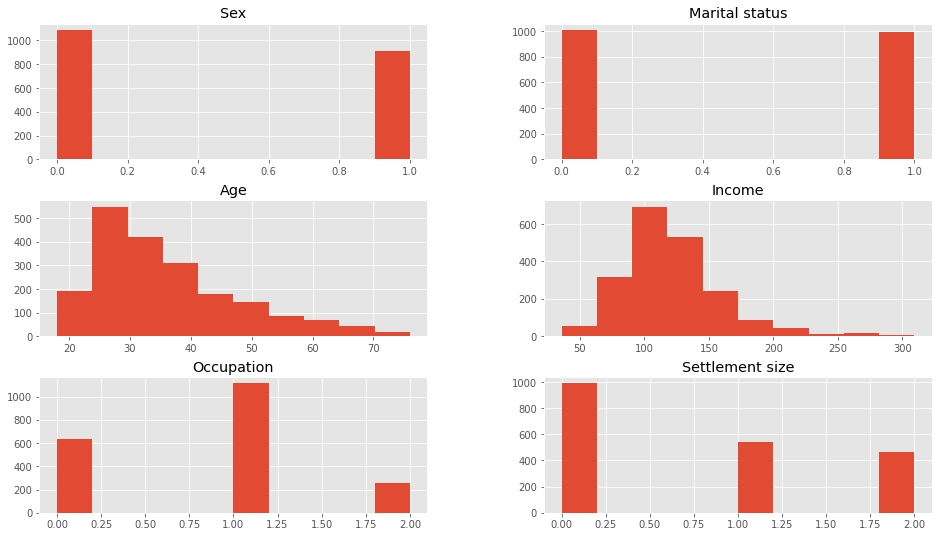

In [ ]:
dataframe.drop(['ID','Education'],1).hist()
plt.show()

Realizamos un histograma para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

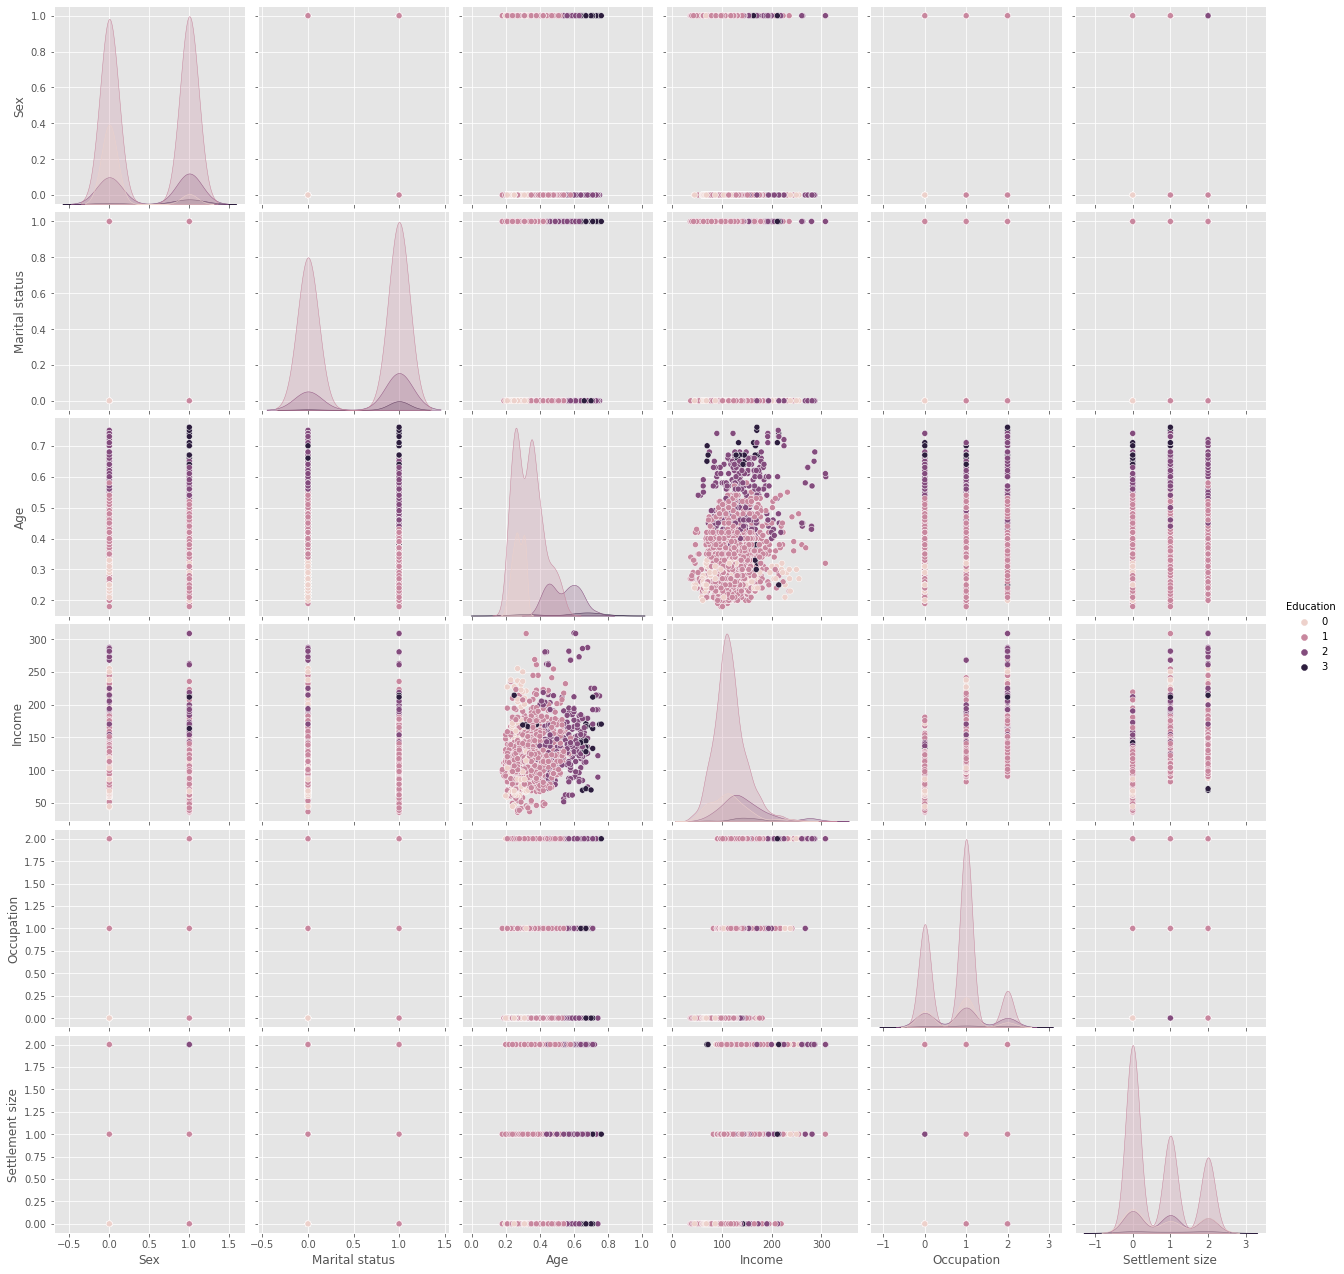

In [ ]:
sb.pairplot(dataframe.dropna(), hue='Education',height=3,vars=['Sex','Marital status','Age','Income','Occupation','Settlement size'],kind='scatter')

Se pueden observar tres grupos bien clasificados en los graficos de income y edad.

## **2.Algoritmo de clustering ( k-means)**


---



###Seleccion de K
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”. Este es nuestro resultado:

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo.Enla variable o categorias a predecir colocamo el nivel de educacion (y= Education). En la X colocaremos el resto de columnas eliminando la columnas de ID del cliente.

In [ ]:
X = np.array(dataframe[['Sex','Marital status','Age','Income','Occupation','Settlement size']])
y = np.array(dataframe['Education'])

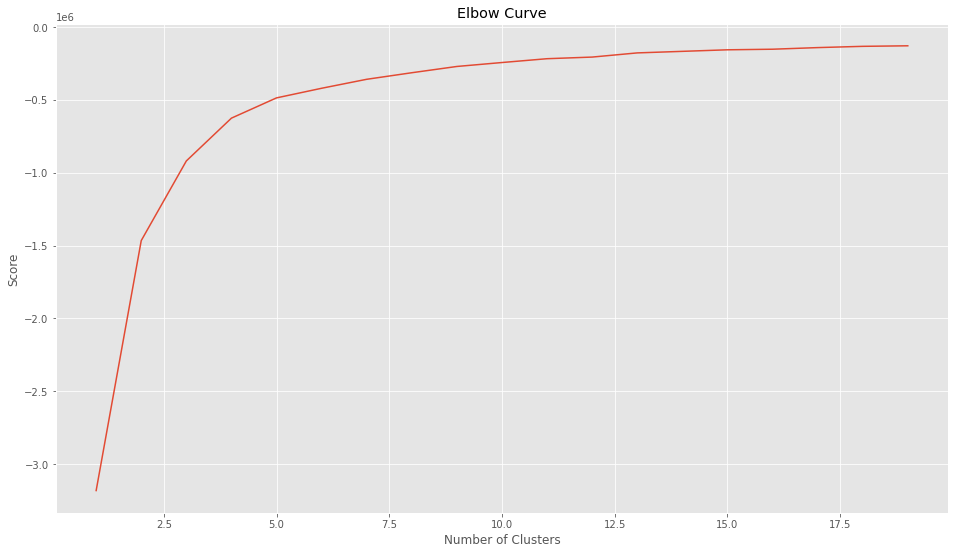

In [ ]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. se puede considerar un valor entre 4 y 7 como un buen número para K.En este caso,como mi intencion es predecir el tipo de formacion tienen los clientes y tengo 4 categorias; seleccionare un K=4.

### Ejecutamos K-Means


---


Ejecutamos el algoritmo para 4 clusters y obtenemos las etiquetas y los centroids.




In [ ]:
kmeans = KMeans(n_clusters=4, n_init='auto').fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.51594747e-01 5.30956848e-01 3.17560976e+01 8.08713884e+01
  2.19512195e-01 2.02626642e-01]
 [3.00230947e-01 4.38799076e-01 4.22632794e+01 1.57942337e+02
  1.28175520e+00 1.22632794e+00]
 [2.40963855e-01 3.73493976e-01 4.41686747e+01 2.33670181e+02
  1.79518072e+00 1.54216867e+00]
 [4.94216614e-01 5.14195584e-01 3.46225026e+01 1.16741042e+02
  8.41219769e-01 7.47634069e-01]]


Utilizaremos el algoritmo K-means para que agrupe estos cliente -no por su nivel educativo- si no, por sus similitudes de edad,ingresos,sexo,etc...

In [ ]:
#vemos el representante del grupo, el cliente mas cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
dataframe.iloc[closest]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
498,100000499,0,1,32,1,80.080,0,0
833,100000834,1,1,42,2,158.405,1,0
87,100000088,0,0,47,1,241.068,1,1
191,100000192,0,0,34,1,116.525,0,0


###Clasificar nuevas muestras

---



Al introducir el nuevo dato (cliente nuevo ) al modelo de clustering, el algoritmo identificará cuál de los cuatro grupos (etiquetados de 0 a 3) es el más cercano al nuevo cliente en términos de características similares a los otros clientes.

In [ ]:
X_new = np.array([[0,0,50,150,0,0]]) #cliente varon de 50 años con ingresos de 150k$
print(kmeans.predict(X_new))

[1]


Se pueden ver la mayoria de las formaciones que tienen los clientes de ese centroide y asignarle al nuevo la educacion de la mayoria de su cluster.

In [ ]:
# Obtener los índices de las muestras del grupo 1
cluster_1_indices = np.where(kmeans.labels_ == 1)[0]
# Obtener los datos del grupo 1
cluster_1_data = dataframe.iloc[cluster_1_indices]
print(cluster_1_data.groupby('Education').size())


Education
0     48
1    251
2    117
3     19
dtype: int64


Basándonos en que en este cluster la mayoria de los clientes tiene un nivel de educación de 1 (primario)se le podría asignar ese al nuevo cliente. Sin embargo, es importante tener en cuenta que la asignación de etiquetas en el clustering es una aproximación y que no necesariamente representa con exactitud las características del nuevo cliente.

###Concusión

---

A persar de que en el ejemplo anterior puedo clasificar al nuevo cliente ;analizando los demas clusters veo que mayoritariamente tienen clientes con nivel eductativo [1] por lo que no considero que sea un modelo apropiado para predecir el nivel educativo de nuevos clientes.

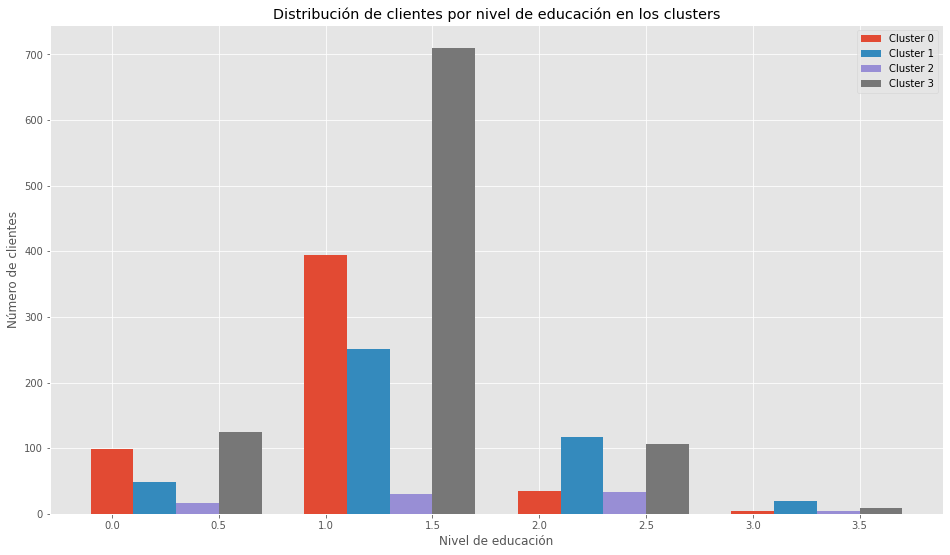

In [ ]:
for i in range(4):
    cluster_data = dataframe[kmeans.labels_ == i]
    education_counts = cluster_data.groupby('Education').size()
    plt.bar(education_counts.index + i*0.2, education_counts.values, width=0.2)

plt.xlabel('Nivel de educación')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes por nivel de educación en los clusters')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()


He realizado varios ensayos con [K] diferentes y obtengo resulatdos similares.
Es posible que el alto número de atributos categóricos y pocos numéricos afecte a la calidad de la clasificación del modelo. Tambien puede influir que mi dataset cuneta con una cantidad de datos muy baja.

##**3.Regresion Lineal multivariable**

importamos las bibliotecas adicionales para realizar este modelo

In [ ]:
from matplotlib import cm
from sklearn import linear_model #algoritmo regresion lineal, modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # (coeficiente de determinación) función de puntuación de regresión. #error cuadratico medio
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

###Regresión Lineal con python

Al igual que en el modelo anterior quiero predecir que estudios o formacion tienen los clientes. Como la columa de entrada

In [ ]:
# cargar datos
df_reg_linear = dataframe

In [ ]:
df_reg_linear.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124.670,1,2
1,100000002,1,1,22,1,150.773,1,2
2,100000003,0,0,49,1,89.210,0,0
3,100000004,0,0,45,1,171.565,1,1
4,100000005,0,0,53,1,149.031,1,1


In [ ]:
# dividir en conjuntos de entrenamiento y prueba
X = df_reg_linear.drop(['Education', 'ID'], axis=1)
y = df_reg_linear['Education']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# crear y ajustar modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# evaluar rendimiento del modelo
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

### Análisis del desempeño del modelo

In [ ]:
# Los coeficientes
print('Coefficients: \n', model.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % score)

Coefficients: 
 [ 1.53198866e-01  5.53583778e-01  3.91754713e-02  3.99186068e-04
 -1.04267142e-02  1.34682535e-02]
Mean squared error: 0.10
Variance score: 0.73


La métrica del "Mean squared error" (MSE) de 0.10 indica que el modelo tiene un error cuadrático medio relativamente bajo, lo que sugiere que los valores pronosticados están cercanos a los valores observados.

El "Variance score" de 0.73 indica que el modelo es capaz de explicar aproximadamente el 73% de la varianza de los datos de salida, lo que también sugiere que el modelo tiene un buen desempeño en general.

###Probando mi modelo
vamos a usar el mismo ejemplo que en el modelo anterior ;varon soltero desempleado de 50 años con ingresos de 100k€ de ciudad pequeña que estaba clasificado en el cluster [3] y tendria un nivel educativo high school.

In [ ]:
# supongamos que tenemos un nuevo registro con las siguientes características
new_data = {'Sex': 0, 'Marital status': 0, 'Age': 50, 'Income': 100, 'Occupation': 0, 'Settlement size': 0}

# crear un DataFrame a partir de los datos
new_df = pd.DataFrame([new_data])

# hacer una predicción
prediction = model.predict(new_df)

print(prediction)

[1.23515927]


como vemos, mi modelo lo clasifica mas cerca del valor 1 que corresponde a una educacion de high school

## **4.Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### 4.1.Modelo de regresión

In [ ]:
# cargar datos
df_random_forest = dataframe

In [ ]:
# dividir en conjuntos de entrenamiento y prueba
X = df_random_forest.drop(['Education', 'ID'], axis=1)
y = df_random_forest['Education']
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Generamos un modelo de 100 arboles

In [ ]:
rf_r = RandomForestRegressor(n_estimators=100, random_state=42)
rf_r.fit(XX_train, yy_train)

RandomForestRegressor(random_state=42)

In [ ]:
yy_pred = rf_r.predict(XX_test)
mse = mean_squared_error(yy_test, yy_pred)
print("Mean squared error: %.2f" % mse)
r2 = r2_score(yy_test, yy_pred)
print("Coeficiente de determinación R2:", r2)

Mean squared error: 0.03
Coeficiente de determinación R2: 0.8847321428571429


Un "Mean squared error" (MSE) de 0.03 indica que tu modelo tiene un error cuadrático medio bastante bajo, lo que sugiere que los valores pronosticados están cercanos a los valores observados.

El coeficiente de determinación R2 de 0.8847 indica que tu modelo es capaz de explicar aproximadamente el 88.47% de la variabilidad en los datos de salida. Esto es un buen resultado y sugiere que tu modelo es capaz de hacer predicciones precisas.

#### Vamos a probar a variar el hiperparametro del numero de arboles para ver como afecta al desempeño de este modelo.

In [ ]:
#prueba con 50 arboles
rf_r = RandomForestRegressor(n_estimators=50, random_state=42)
rf_r.fit(XX_train, yy_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
yy_pred = rf_r.predict(XX_test)
mse = mean_squared_error(yy_test, yy_pred)
print("Mean squared error: %.2f" % mse)
r2 = r2_score(yy_test, yy_pred)
print("Coeficiente de determinación R2:", r2)

Mean squared error: 0.03
Coeficiente de determinación R2: 0.8821359223300971


In [ ]:
#prueba con 200 arboles
rf_r = RandomForestRegressor(n_estimators=200, random_state=42)
rf_r.fit(XX_train, yy_train)
yy_pred = rf_r.predict(XX_test)
mse = mean_squared_error(yy_test, yy_pred)
print("Mean squared error: %.2f" % mse)
r2 = r2_score(yy_test, yy_pred)
print("Coeficiente de determinación R2:", r2)

Mean squared error: 0.03
Coeficiente de determinación R2: 0.8838813280166435


Los resultados sugieren que el número de árboles en el modelo no tiene un impacto significativo en el rendimiento del modelo de Random Forest Regression.

Tanto el MSE como el coeficiente de determinación R2 son muy similares para 50 y 200 árboles, con una diferencia de sólo 0.0017 en el valor del coeficiente de determinación R2. Esto sugiere que agregar más árboles no está mejorando significativamente la capacidad del modelo para hacer predicciones precisas.

### 4.2.Modelo de clasificación

In [ ]:
# Crear un modelo de random forest con 50 árboles de decisión
rf_c = RandomForestClassifier(n_estimators=50, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_c.fit(XX_train, yy_train)

# Obtener las etiquetas predichas para el conjunto de datos de prueba
yy_pred = rf_c.predict(XX_test)

# Calcular la matriz de confusión
cm = confusion_matrix(yy_test, yy_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[ 43   2   0   0]
 [  7 289   3   0]
 [  0   1  50   0]
 [  0   1   2   2]]


En general, la matriz de confusión muestra que el modelo tuvo un buen desempeño en la clasificación, ya que la mayoría de las predicciones fueron correctas.

In [ ]:
accuracy = accuracy_score(yy_test, yy_pred)
print("Exactitud:", accuracy)
precision = precision_score(yy_test, yy_pred, average=None)
print("Precisión por clase:", precision)

Exactitud: 0.96
Precisión por clase: [0.86       0.98634812 0.90909091 1.        ]


La matriz de confusión muestra que el modelo tiende a clasificar correctamente la mayoría de las muestras, con un total de 384 muestras clasificadas correctamente y sólo 13 muestras clasificadas incorrectamente. La exactitud del modelo es de 0.96, lo que indica que el modelo clasifica correctamente el 96% de las muestras.

La precisión por clase muestra que la precisión del modelo es alta en general, con una precisión del 98.63% para la clase 2, que es la clase con la mayor cantidad de muestras. Sin embargo, la precisión para la clase 0 es un poco baja en comparación con las otras clases, con una precisión del 86%. Esto sugiere que el modelo puede tener dificultades para clasificar correctamente las muestras de la clase 0.

En general, estos resultados sugieren que el modelo de clasificación Random Forest es un modelo sólido, aunque es posible que necesite ajustes para mejorar su capacidad de clasificar correctamente las muestras de la clase 0.

### Probando mis modelos

Regresión

In [ ]:
# Crear un nuevo registro con la información a predecir
new_data = [[0, 0, 50, 100,0,0]]

# Predecir la variable objetivo usando el modelo de regresión lineal
prediccion_rl = rf_r.predict(new_data)

print(prediccion_rl)


[1.]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Clasificación

In [ ]:
clase_predicha = rf_c.predict(new_data)
print(clase_predicha)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Vemos que usando ambos modelos se predice que el nuevo cliente tiene una formacion tipo '1' correspondiente a 'high school'.